# Data Preprocessing & Feature Engineering for Machine Learning (Housing Dataset)

## 1st : Data Import and first Inspection

In [1]:
# imporrt all the important libraries before start working:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

1. __Import__ the housing dataset (housing.csv) and __inspect__

In [2]:
# import the dataset from csv file:
df = pd.read_csv("housing.csv")

In [3]:
# present first 5 rows of the dataset to take the first look:
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


__Features__:

* **longitude:**  geographic coordinate (district´s east-west position)
* **latitude:**  geographic coordinate (district´s north-south position)
* **housing_median_age:** median age of houses in district
* **total_rooms** Sum of all rooms in district
* **total_bedrooms** Sum of all bedrooms in district
* **population:** total population in district
* **households:** total households in district (group of people who live together and share money)
* **median_income:** median household income in district 
* **median_house_value:** median house value in district
* **ocean_proximity:** District´s proximity to the ocean

In [4]:
# Info about the dataset, object types,num of rows ,... :
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [5]:
# we can see that we have a total of 20640 values in each column
# but there are some missing values at total_bedrooms 
# so we take a look at the rows where total_bedroom are null:
df[df.total_bedrooms.isna()]

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
290,-122.16,37.77,47.0,1256.0,NaN,570.0,218.0,4.3750,161900.0,NEAR BAY
341,-122.17,37.75,38.0,992.0,NaN,732.0,259.0,1.6196,85100.0,NEAR BAY
538,-122.28,37.78,29.0,5154.0,NaN,3741.0,1273.0,2.5762,173400.0,NEAR BAY
563,-122.24,37.75,45.0,891.0,NaN,384.0,146.0,4.9489,247100.0,NEAR BAY
696,-122.10,37.69,41.0,746.0,NaN,387.0,161.0,3.9063,178400.0,NEAR BAY
...,...,...,...,...,...,...,...,...,...,...
20267,-119.19,34.20,18.0,3620.0,NaN,3171.0,779.0,3.3409,220500.0,NEAR OCEAN
20268,-119.18,34.19,19.0,2393.0,NaN,1938.0,762.0,1.6953,167400.0,NEAR OCEAN
20372,-118.88,34.17,15.0,4260.0,NaN,1701.0,669.0,5.1033,410700.0,<1H OCEAN
20460,-118.75,34.29,17.0,5512.0,NaN,2734.0,814.0,6.6073,258100.0,<1H OCEAN


In [6]:
# we can also check duplicated values, sometimes we have one of these
# but as we see, there are non:
df[df.duplicated()]

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity


### Analyse numerical columns :

In [7]:
# with describe, we can present numerical statistics about df :
# for example we can see that house values are between 14,999 - 500,001
df.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


### Analyse text columns : ocean_proximity

In [8]:
# text statistics about df (about text columns):
# we can see that the most frequent values is <1H OCEAN, but we 
# also have 5 unique values
df.describe(include = "O")

,ocean_proximity
count,20640
unique,5
top,<1H OCEAN
freq,9136


In [9]:
# in order to check what are the 5 unique values
# we should use value_counts to see wich values and what are there frequency
# we have only 5 houses located on island
df.ocean_proximity.value_counts()

<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: ocean_proximity, dtype: int64

### Histogram

<function matplotlib.pyplot.show(close=None, block=None)>

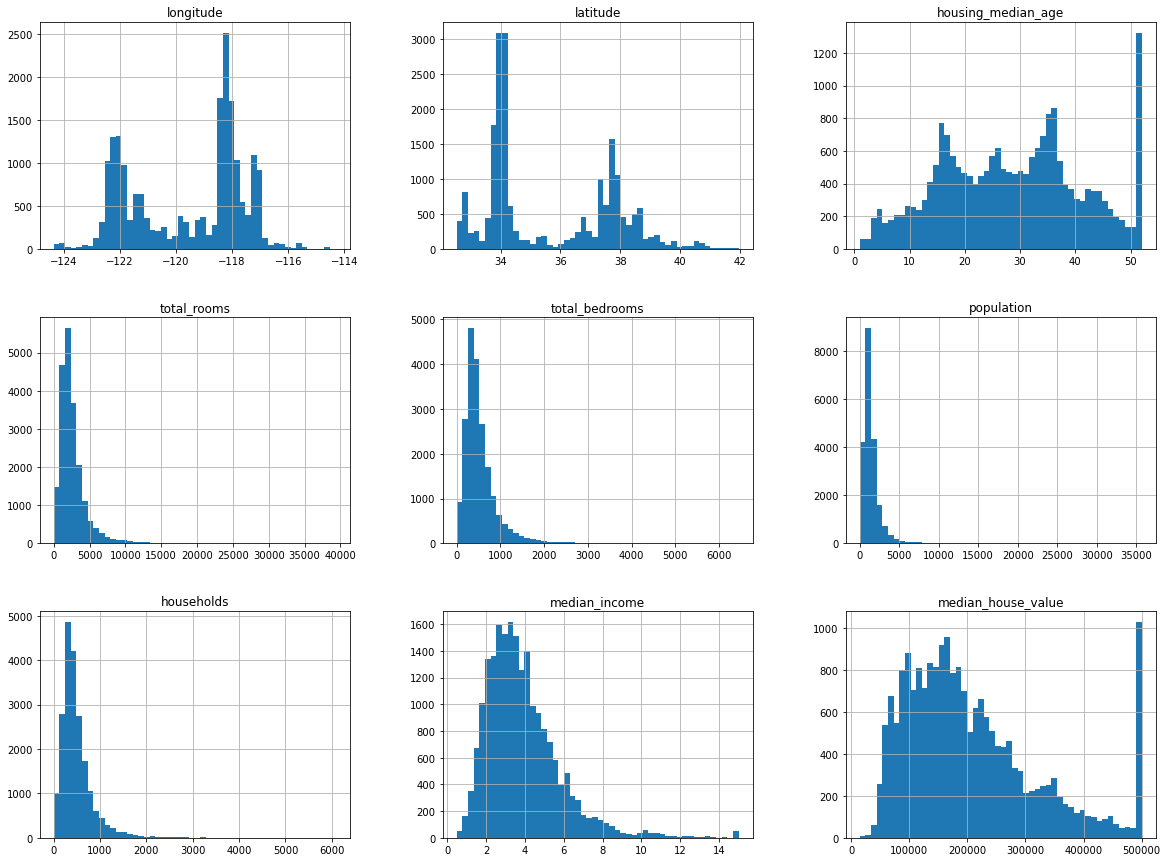

In [10]:
# With histogram chart we can see how the distribution of each column's values:
df.hist(bins=50, figsize=(20,15))
plt.show

### Examples of insights from histograms:

#### households : typical value between like 200-300 but we have some extreme values
#### median_age : we have also good amount of values between 50-52
#### and so on, it's only the first insight

## 2nd: Data Cleaning and Creating additional Features

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


2. __Drop__ all rows with (at least one) missing value(s).

In [12]:
# we have only like 207 null values in total_bedrooms column
# it will not affect the result too much with 20K rows dataset, so we will drop them :
df.dropna(inplace = True)

3. __Add__ the additional Feature __"rooms_per_household"__ 
 , __It__ can be a good feature __that affects__ house price 

In [13]:
# we will discover later if really there is a strong relationship 
# between this new feature and the prices, but I had the feeling 
# that it could be important so I added it, max we can delete it later
df["rooms_per_household"] = df.total_rooms.div(df.households)

In [14]:
# take a look on the 10 largest / smallest values of that :
df.rooms_per_household.nlargest(10)

1914     141.909091
1979     132.533333
12447     62.422222
1913      61.812500
11862     59.875000
1912      56.269231
9676      52.848214
11707     52.690476
2395      50.837838
1240      47.515152
Name: rooms_per_household, dtype: float64

In [15]:
# we have 2 values that are less than 1, wich is not really logical
# but in df with 20K rows, it doesnt really matter
df.rooms_per_household.nsmallest(10)

5916     0.846154
8219     0.888889
3126     1.000000
14818    1.130435
17820    1.130435
4552     1.260870
4550     1.378486
4587     1.411290
4602     1.465753
12484    1.550409
Name: rooms_per_household, dtype: float64

In [16]:
# anyway we can take a look at them just so we know if there's something interesting:
df.loc[[5916, 8219]]

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,rooms_per_household
5916,-118.44,34.28,46.0,11.0,11.0,24.0,13.0,2.8750,162500.0,<1H OCEAN,0.846154
8219,-118.21,33.79,33.0,32.0,18.0,96.0,36.0,4.5938,112500.0,NEAR OCEAN,0.888889


4. __Add__ the additional Feature __"population_per_household"__ , like the last one it can be important: 

In [17]:
df["population_per_household"] = df.population.div(df.households)

5. __Add__ the additional Feature __"bedrooms_per_room"__ 

In [18]:
df["bedrooms_per_room"] = df.total_bedrooms.div(df.total_rooms)

In [19]:
# after we added those 3 new features, let's take a look at our df :
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,rooms_per_household,population_per_household,bedrooms_per_room
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY,6.984127,2.555556,0.146591
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY,6.238137,2.109842,0.155797
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY,8.288136,2.802260,0.129516
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY,5.817352,2.547945,0.184458
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY,6.281853,2.181467,0.172096


In [20]:
df.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,rooms_per_household,population_per_household,bedrooms_per_room
count,20433.000000,20433.000000,20433.000000,20433.000000,20433.000000,20433.000000,20433.000000,20433.000000,20433.000000,20433.000000,20433.000000,20433.000000
mean,-119.570689,35.633221,28.633094,2636.504233,537.870553,1424.946949,499.433465,3.871162,206864.413155,5.431344,3.071533,0.213039
std,2.003578,2.136348,12.591805,2185.269567,421.385070,1133.208490,382.299226,1.899291,115435.667099,2.482946,10.438269,0.057983
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000,0.846154,0.692308,0.100000
25%,-121.800000,33.930000,18.000000,1450.000000,296.000000,787.000000,280.000000,2.563700,119500.000000,4.441441,2.429032,0.175427
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.536500,179700.000000,5.230769,2.817582,0.203162
75%,-118.010000,37.720000,37.000000,3143.000000,647.000000,1722.000000,604.000000,4.744000,264700.000000,6.052381,3.281513,0.239821
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000,141.909091,1243.333333,1.000000


## 3rd : Discover Which Factors influence House Prices?

In [21]:
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,rooms_per_household,population_per_household,bedrooms_per_room
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY,6.984127,2.555556,0.146591
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY,6.238137,2.109842,0.155797
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY,8.288136,2.802260,0.129516
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY,5.817352,2.547945,0.184458
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY,6.281853,2.181467,0.172096


<function matplotlib.pyplot.show(close=None, block=None)>

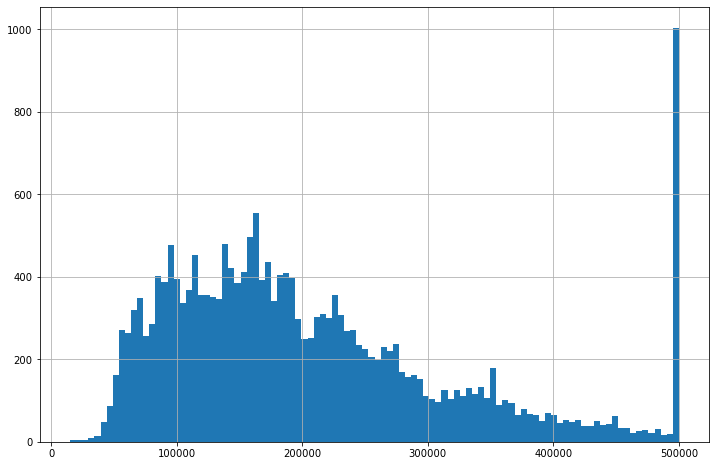

In [22]:
# Our LABEL column is **median_house_value**,
# it's the reason why we are building a ML model..
# so let's make a histogram for it:
df.median_house_value.hist(bins=100, figsize = (12, 8))
plt.show

6. the __Correlation__ between "median_house_value" and all features. Which factors seems to influence house prices/values?
#### So we check lenear relationship between label and other columns

In [23]:
df.corr().median_house_value.sort_values(ascending = False)
# positive : the higher the median_income the higher the prices
# negative : the lower the bedrooms per room the higher the prices
# first 4 have good positive(>=0.1), next 5 have no much effect,
# last 2 good negative (<=-0.1)

median_house_value          1.000000
median_income               0.688355
rooms_per_household         0.151344
total_rooms                 0.133294
housing_median_age          0.106432
households                  0.064894
total_bedrooms              0.049686
population_per_household   -0.023639
population                 -0.025300
longitude                  -0.045398
latitude                   -0.144638
bedrooms_per_room          -0.255880
Name: median_house_value, dtype: float64

<function matplotlib.pyplot.show(close=None, block=None)>

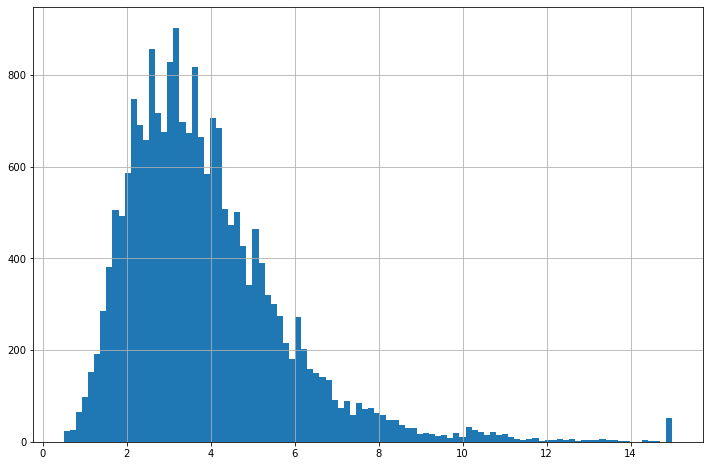

In [24]:
# analyse the median_income, since it has a strong effect:
df.median_income.hist(bins=100, figsize = (12, 8))
plt.show
# most frequent values between 2 and 4
# values can reach 15 sometimes

7. __Creating__ a Seaborn Regression plot (__jointplot__) with income on the x-axis and house value on the y-axis, to understand the relationship between the income and the value

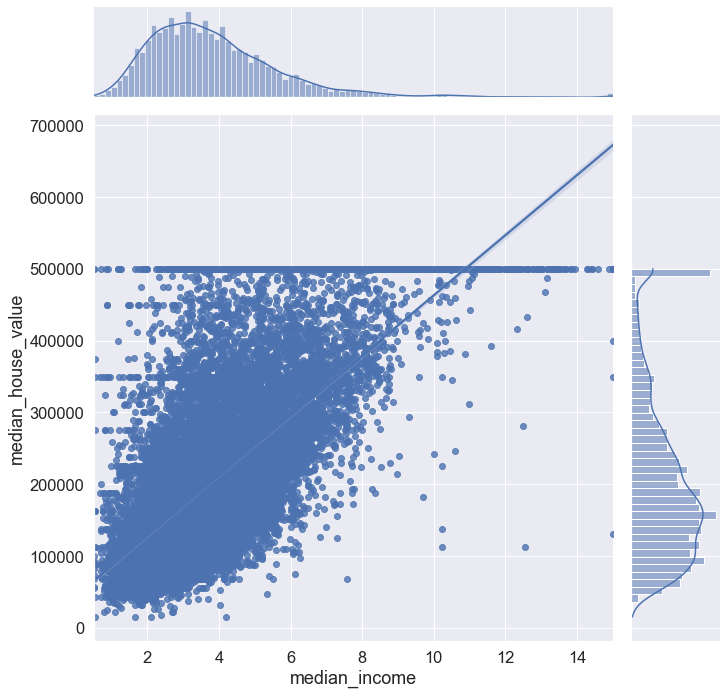

In [25]:
# we can see that there is strong lenear relationship between them
# (the higher the income, the higher the house value)
# we can also see that maximum house value is 500,000
sns.set(font_scale = 1.5)
sns.jointplot(data = df, x = "median_income", y = "median_house_value",
             kind = "reg", height = 10)
plt.show()

__Creating__ a Seaborn KDE(kernel density estimator) plot with income on the x-axis and house value on the y-axis, to understand the relationship between the income and the value

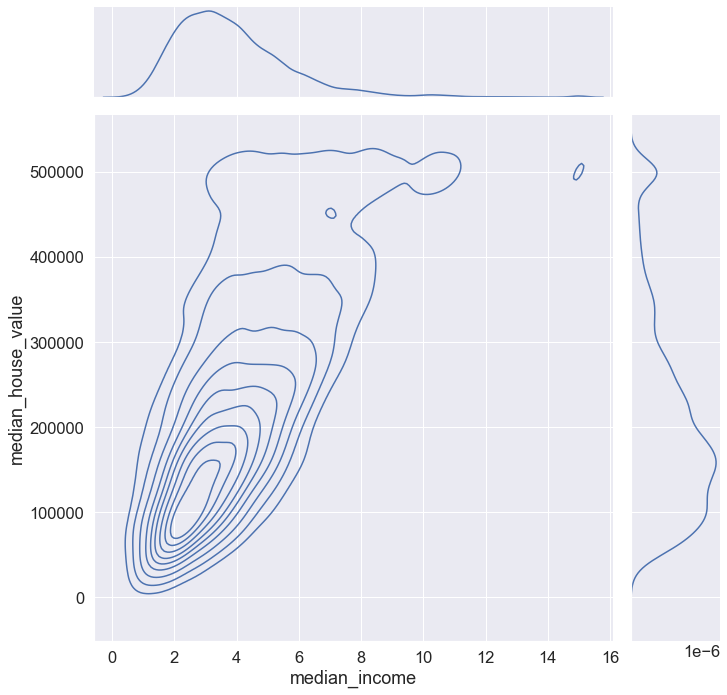

In [26]:
# we can see the most frequent values where 
# we could find the most data points:
# income = 2, house values 100,000
sns.set(font_scale = 1.5)
sns.jointplot(data = df, x = "median_income", y = "median_house_value",
             kind = "kde", height = 10)
plt.show()

#### We analysed a feature with positive relationship 
#### let's analyse the longitude, latitude
#### they both have negative relationship with the label and related to each other

8. __Creating__  __scatterplot__ (df.plot(kind = "scatter")) with
- longitude on x-axis
- latitude on y-axis
- size (s) of data points determined by population
- color (c) of data points determined by median_house_value

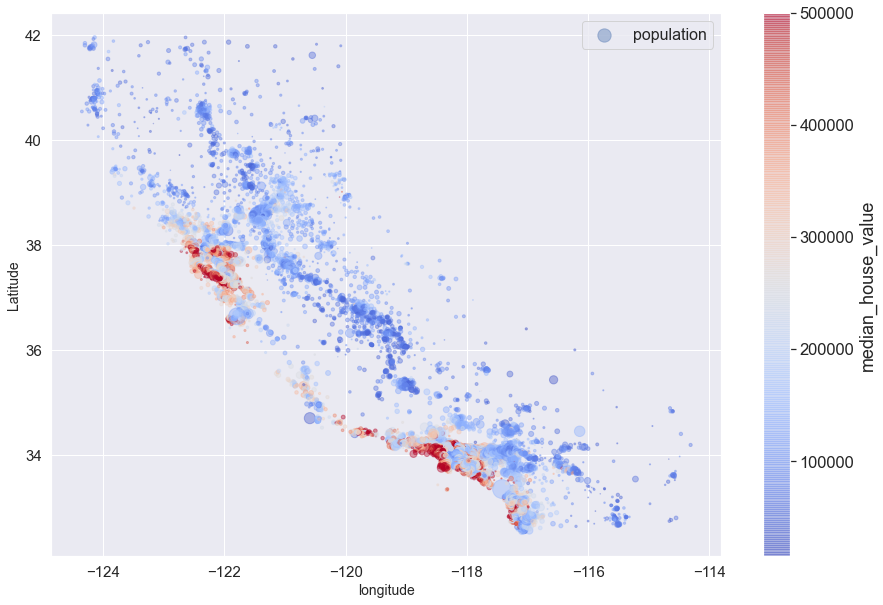

In [27]:
df.plot(kind = "scatter", x = "longitude", y = "latitude",
       s = df.population/100, label = "population", figsize = (15,10),
       c = "median_house_value", cmap = "coolwarm",
       colorbar = True, alpha = 0.4, fontsize = 15, sharex = False)

plt.ylabel("Latitude", fontsize = 14)
plt.xlabel("longitude", fontsize = 14)
plt.legend(fontsize = 16)
plt.show()

## 4th : Advanced Explanatory Data Analyis with Seaborn

9. __Adding__ the additional column __"income_cat"__ with the following income categories:
- lowest 25% -> "Low"
- 25th to 50th percentile -> "Below_Average"
- 50th to 75th percentile -> "Above_Average"
- 75th to 95th percentile -> "High"

- Above 95th percentile -> "Very High"

In [28]:
# we can see that the highest category have values between 7.3-15
# and we can see also the other categories, so instead of having just numbers
# we devided the income levels into 5 categories
pd.qcut(df.median_income, q = [0, 0.25, 0.5, 0.75, 0.95, 1])

0           (7.3, 15.0]
1           (7.3, 15.0]
2          (4.744, 7.3]
3          (4.744, 7.3]
4        (3.536, 4.744]
              ...      
20635    (0.499, 2.564]
20636    (0.499, 2.564]
20637    (0.499, 2.564]
20638    (0.499, 2.564]
20639    (0.499, 2.564]
Name: median_income, Length: 20433, dtype: category
Categories (5, interval[float64]): [(0.499, 2.564] < (2.564, 3.536] < (3.536, 4.744] < (4.744, 7.3] < (7.3, 15.0]]

In [29]:
# and in order to have organized column and meaningful
# let's give names to the categories 
df["income_cat"] = pd.qcut(df.median_income, q = [0, 0.25, 0.5, 0.75, 0.95, 1],
                          labels = ["low", "Below_Average", "Above_Average",
                                   "High", "Very_high"])

In [30]:
df.income_cat

0            Very_high
1            Very_high
2                 High
3                 High
4        Above_Average
             ...      
20635              low
20636              low
20637              low
20638              low
20639              low
Name: income_cat, Length: 20433, dtype: category
Categories (5, object): ['low' < 'Below_Average' < 'Above_Average' < 'High' < 'Very_high']

### Analyse the income_cat column:

In [31]:
# instead of getting the absolute counts we can 
# get the relative counts ( like cumulative if we sum them)
# by passing normalize
df.income_cat.value_counts(normalize = True)

low              0.250037
Above_Average    0.250037
Below_Average    0.249988
High             0.199922
Very_high        0.050017
Name: income_cat, dtype: float64

11. __Creating__ a plot (countplot) that shows the count of each category in each area depending on ocean_proximity:

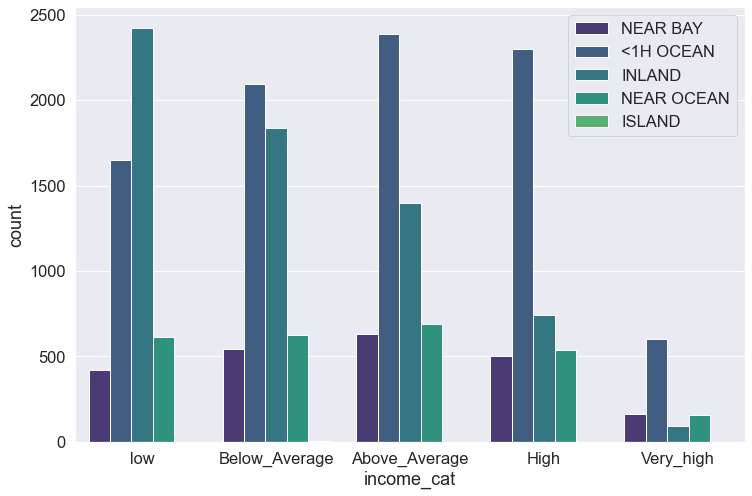

In [32]:
plt.figure(figsize=(12,8))
sns.set(font_scale=1.5, palette = "viridis")
sns.countplot(data = df, x = "income_cat", hue = "ocean_proximity")
plt.legend(loc = 1)
plt.show()
# we can see that districts with low income are located basically 
# in 'INLAND' areas, that's an interesting insight

11.2 __Creating__ a plot (barplot) for the relathionship between income and house value

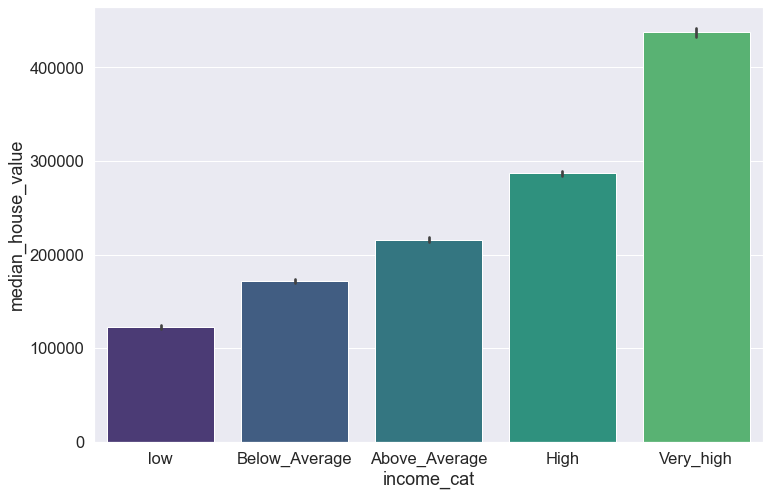

In [33]:
plt.figure(figsize=(12,8))
sns.set(font_scale=1.5, palette = "viridis")
sns.barplot(data = df, x = "income_cat", y = "median_house_value", dodge = True)
plt.show()
# simply says that the higher median income > higher house value

11.3 __Creating__ a plot (barplot) for the relathionship between ocean proximity and house value

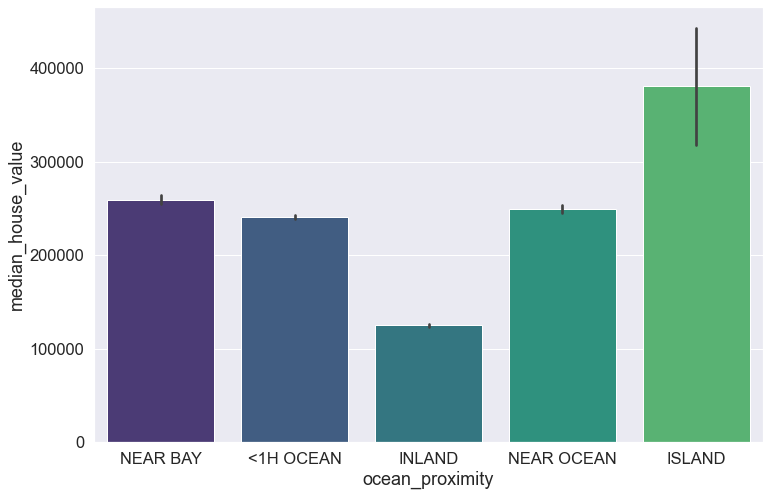

In [34]:
plt.figure(figsize=(12,8))
sns.set(font_scale=1.5, palette = "viridis")
sns.barplot(data = df, x = "ocean_proximity", y = "median_house_value", dodge = True)
plt.show()
# we can ignore island because we have only 5 districts
# near bay and near ocean values are so close, inland is the lowest

12. __Create__ (and interpret) the following Seaborn __Heatmap__ with mean house values for all combinations of income_cat & ocean_proximity:

In [35]:
# income_cat and ocean_proximity are the only categorial features we have
# this simply means that we make a matrix that represents the relationship
# between those 2 features looking at the median house value in each box

In [36]:
matrix = df.groupby(["income_cat",
                    "ocean_proximity"]).median_house_value.mean().unstack().drop(columns = ["ISLAND"])

In [37]:
matrix.astype("int")

ocean_proximity,<1H OCEAN,INLAND,NEAR BAY,NEAR OCEAN
income_cat,,,,
low,161337,84820,155122,148027
Below_Average,197236,115124,220196,208665
Above_Average,232278,147846,261965,255293
High,292208,208095,322566,337446
Very_high,439784,347571,451015,468739


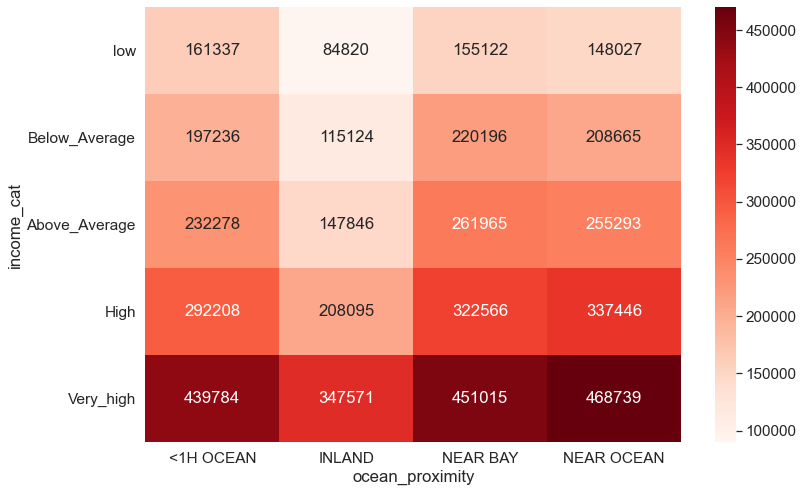

In [38]:
plt.figure(figsize=(12,8))
sns.set(font_scale = 1.4)
sns.heatmap(matrix.astype("int"), cmap = "Reds", annot = True,
           fmt = "d", vmin = 90000, vmax = 470000)
plt.show()
# we can see that the highest value combines near ocean and very high
# and that the lowest is a combination between inland and low

## 5th : Feature Engineering - Part 1

In [39]:
# choosing the lable :
label = df.median_house_value.copy()
label

0        452600.0
1        358500.0
2        352100.0
3        341300.0
4        342200.0
           ...   
20635     78100.0
20636     77100.0
20637     92300.0
20638     84700.0
20639     89400.0
Name: median_house_value, Length: 20433, dtype: float64

In [40]:
# choosing the features :
features = df.drop(columns = ["median_house_value"])
features.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,rooms_per_household,population_per_household,bedrooms_per_room,income_cat
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,NEAR BAY,6.984127,2.555556,0.146591,Very_high
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,NEAR BAY,6.238137,2.109842,0.155797,Very_high
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,NEAR BAY,8.288136,2.802260,0.129516,High
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,NEAR BAY,5.817352,2.547945,0.184458,High
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,NEAR BAY,6.281853,2.181467,0.172096,Above_Average


In [41]:
# we have many numerical features and many scales (thousands\hundreds\..)
features.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20433 entries, 0 to 20639
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype   
---  ------                    --------------  -----   
 0   longitude                 20433 non-null  float64 
 1   latitude                  20433 non-null  float64 
 2   housing_median_age        20433 non-null  float64 
 3   total_rooms               20433 non-null  float64 
 4   total_bedrooms            20433 non-null  float64 
 5   population                20433 non-null  float64 
 6   households                20433 non-null  float64 
 7   median_income             20433 non-null  float64 
 8   ocean_proximity           20433 non-null  object  
 9   rooms_per_household       20433 non-null  float64 
 10  population_per_household  20433 non-null  float64 
 11  bedrooms_per_room         20433 non-null  float64 
 12  income_cat                20433 non-null  category
dtypes: category(1), float64(11), object(1)
memory 

In [42]:
# we can see that all the numerical columns have the type "float"
# let's select all of them and have a look :
features.select_dtypes("float")

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,rooms_per_household,population_per_household,bedrooms_per_room
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,6.984127,2.555556,0.146591
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,6.238137,2.109842,0.155797
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,8.288136,2.802260,0.129516
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,5.817352,2.547945,0.184458
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,6.281853,2.181467,0.172096
...,...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,5.045455,2.560606,0.224625
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,6.114035,3.122807,0.215208
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,5.205543,2.325635,0.215173
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,5.329513,2.123209,0.219892


In [43]:
# Standrize the data: 
# as mentioned previously, we have many numerical features and many scales 
# so we need to standrize the data so they can have the same standard
import scipy.stats as stats

In [44]:
feat1 = features.select_dtypes("float").apply(lambda x: stats.zscore(x))
feat1

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,rooms_per_household,population_per_household,bedrooms_per_room
0,-1.327314,1.051717,0.982163,-0.803813,-0.970325,-0.973320,-0.976833,2.345163,0.625395,-0.049433,-1.146024
1,-1.322323,1.042355,-0.606210,2.042130,1.348276,0.861339,1.670373,2.332632,0.324942,-0.092134,-0.987254
2,-1.332305,1.037674,1.855769,-0.535189,-0.825561,-0.819769,-0.843427,1.782939,1.150594,-0.025797,-1.440514
3,-1.337296,1.037674,1.855769,-0.623510,-0.718768,-0.765056,-0.733562,0.932970,0.155467,-0.050162,-0.492925
4,-1.337296,1.037674,1.855769,-0.461970,-0.611974,-0.758879,-0.628930,-0.013143,0.342549,-0.085272,-0.706141
...,...,...,...,...,...,...,...,...,...,...,...
20635,-0.758318,1.800677,-0.288535,-0.444580,-0.388895,-0.511787,-0.443207,-1.216727,-0.155420,-0.048949,0.199820
20636,-0.818212,1.805358,-0.844466,-0.887557,-0.920488,-0.943315,-1.008223,-0.692044,0.274959,0.004912,0.037412
20637,-0.823203,1.777272,-0.923885,-0.175042,-0.125472,-0.368826,-0.173778,-1.143171,-0.090943,-0.071460,0.036808
20638,-0.873115,1.777272,-0.844466,-0.355344,-0.305834,-0.603564,-0.393506,-1.055136,-0.041013,-0.090853,0.118204


In [45]:
# to show the effect of this standrization method :
pd.options.display.float_format = '{:.2f}'.format

In [46]:
# we can see taht mean is 0, std is 1 for all aolumns
# and that is what's called standrizing features
# so all the features have the same scale
feat1.agg(["mean", "std"])

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,rooms_per_household,population_per_household,bedrooms_per_room
mean,-0.00,0.00,-0.00,0.00,0.00,-0.00,0.00,0.00,-0.00,0.00,0.00
std,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00


## 6th : Feature Engineering - Part 2

In [47]:
# ML models cant handle text data so we need to transform to numbers

In [48]:
features.ocean_proximity

0        NEAR BAY
1        NEAR BAY
2        NEAR BAY
3        NEAR BAY
4        NEAR BAY
           ...   
20635      INLAND
20636      INLAND
20637      INLAND
20638      INLAND
20639      INLAND
Name: ocean_proximity, Length: 20433, dtype: object

In [49]:
features.ocean_proximity.value_counts()

<1H OCEAN     9034
INLAND        6496
NEAR OCEAN    2628
NEAR BAY      2270
ISLAND           5
Name: ocean_proximity, dtype: int64

In [50]:
# we can do this with 'dummy' method
# we transform the categories to 0,1 values
# and for each district the 1 will appear only where it exists:
dummies = pd.get_dummies(features.ocean_proximity)
dummies

,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN
0,0,0,0,1,0
1,0,0,0,1,0
2,0,0,0,1,0
3,0,0,0,1,0
4,0,0,0,1,0
...,...,...,...,...,...
20635,0,1,0,0,0
20636,0,1,0,0,0
20637,0,1,0,0,0
20638,0,1,0,0,0


In [51]:
# Merge all the features :
features = pd.concat([feat1, dummies, df.income_cat], axis = 1)
features

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,rooms_per_household,population_per_household,bedrooms_per_room,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN,income_cat
0,-1.33,1.05,0.98,-0.80,-0.97,-0.97,-0.98,2.35,0.63,-0.05,-1.15,0,0,0,1,0,Very_high
1,-1.32,1.04,-0.61,2.04,1.35,0.86,1.67,2.33,0.32,-0.09,-0.99,0,0,0,1,0,Very_high
2,-1.33,1.04,1.86,-0.54,-0.83,-0.82,-0.84,1.78,1.15,-0.03,-1.44,0,0,0,1,0,High
3,-1.34,1.04,1.86,-0.62,-0.72,-0.77,-0.73,0.93,0.16,-0.05,-0.49,0,0,0,1,0,High
4,-1.34,1.04,1.86,-0.46,-0.61,-0.76,-0.63,-0.01,0.34,-0.09,-0.71,0,0,0,1,0,Above_Average
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20635,-0.76,1.80,-0.29,-0.44,-0.39,-0.51,-0.44,-1.22,-0.16,-0.05,0.20,0,1,0,0,0,low
20636,-0.82,1.81,-0.84,-0.89,-0.92,-0.94,-1.01,-0.69,0.27,0.00,0.04,0,1,0,0,0,low
20637,-0.82,1.78,-0.92,-0.18,-0.13,-0.37,-0.17,-1.14,-0.09,-0.07,0.04,0,1,0,0,0,low
20638,-0.87,1.78,-0.84,-0.36,-0.31,-0.60,-0.39,-1.06,-0.04,-0.09,0.12,0,1,0,0,0,low


## 7th : Splitting Data Into Train And Test Set

In [52]:
features

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,rooms_per_household,population_per_household,bedrooms_per_room,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN,income_cat
0,-1.33,1.05,0.98,-0.80,-0.97,-0.97,-0.98,2.35,0.63,-0.05,-1.15,0,0,0,1,0,Very_high
1,-1.32,1.04,-0.61,2.04,1.35,0.86,1.67,2.33,0.32,-0.09,-0.99,0,0,0,1,0,Very_high
2,-1.33,1.04,1.86,-0.54,-0.83,-0.82,-0.84,1.78,1.15,-0.03,-1.44,0,0,0,1,0,High
3,-1.34,1.04,1.86,-0.62,-0.72,-0.77,-0.73,0.93,0.16,-0.05,-0.49,0,0,0,1,0,High
4,-1.34,1.04,1.86,-0.46,-0.61,-0.76,-0.63,-0.01,0.34,-0.09,-0.71,0,0,0,1,0,Above_Average
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20635,-0.76,1.80,-0.29,-0.44,-0.39,-0.51,-0.44,-1.22,-0.16,-0.05,0.20,0,1,0,0,0,low
20636,-0.82,1.81,-0.84,-0.89,-0.92,-0.94,-1.01,-0.69,0.27,0.00,0.04,0,1,0,0,0,low
20637,-0.82,1.78,-0.92,-0.18,-0.13,-0.37,-0.17,-1.14,-0.09,-0.07,0.04,0,1,0,0,0,low
20638,-0.87,1.78,-0.84,-0.36,-0.31,-0.60,-0.39,-1.06,-0.04,-0.09,0.12,0,1,0,0,0,low


### Test set

In [53]:
# Size :
test_size = 0.2

In [54]:
# make a random dataset with 0.2 size of the data :
X_test = features.sample(frac = test_size, random_state = 123)

In [55]:
X_test

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,rooms_per_household,population_per_household,bedrooms_per_room,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN,income_cat
14354,1.17,-1.35,-0.45,-0.10,0.27,-0.13,0.25,-0.39,-0.56,-0.09,0.99,0,0,0,0,1,Below_Average
12908,-0.86,1.40,-0.37,0.11,-0.03,-0.12,-0.03,-0.29,0.18,-0.04,-0.51,0,1,0,0,0,Below_Average
19545,-0.70,0.93,0.82,-0.13,0.16,0.55,0.28,-1.14,-0.62,0.03,0.76,0,1,0,0,0,low
12188,1.11,-0.91,-1.40,-0.64,-0.72,-0.74,-0.81,-0.40,0.42,-0.00,-0.36,1,0,0,0,0,Below_Average
14786,1.22,-1.43,-0.61,-0.41,-0.58,-0.39,-0.53,0.50,0.16,0.02,-0.75,0,0,0,0,1,High
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10262,0.85,-0.82,-0.69,0.61,0.01,0.41,0.11,1.43,0.77,0.04,-1.33,1,0,0,0,0,High
3614,0.58,-0.65,0.74,-0.98,-1.04,-0.90,-1.04,-0.39,-0.21,0.09,-0.12,1,0,0,0,0,Below_Average
19296,-1.62,1.30,0.90,-0.11,-0.27,-0.33,-0.19,0.01,0.09,-0.06,-0.64,1,0,0,0,0,Above_Average
5826,0.63,-0.68,1.86,-0.43,-0.62,-0.60,-0.62,0.49,0.43,-0.02,-0.87,1,0,0,0,0,High


In [56]:
# Let's check what is the accuracy of our sample based on income_cat
# the disrebudtion on this column should be like this :
features.income_cat.value_counts(normalize = True)

low             0.25
Above_Average   0.25
Below_Average   0.25
High            0.20
Very_high       0.05
Name: income_cat, dtype: float64

In [57]:
# so let's check the sample :
X_test.income_cat.value_counts(normalize = True)
# and we can see that the sample is accurate:

Above_Average   0.25
Below_Average   0.25
low             0.25
High            0.20
Very_high       0.05
Name: income_cat, dtype: float64

### Training set

In [58]:
# Like this i can choose all the values that are NOT in the test set :
X_train = features.loc[~features.index.isin(X_test.index)].copy()

In [59]:
X_train

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,rooms_per_household,population_per_household,bedrooms_per_room,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN,income_cat
0,-1.33,1.05,0.98,-0.80,-0.97,-0.97,-0.98,2.35,0.63,-0.05,-1.15,0,0,0,1,0,Very_high
1,-1.32,1.04,-0.61,2.04,1.35,0.86,1.67,2.33,0.32,-0.09,-0.99,0,0,0,1,0,Very_high
2,-1.33,1.04,1.86,-0.54,-0.83,-0.82,-0.84,1.78,1.15,-0.03,-1.44,0,0,0,1,0,High
3,-1.34,1.04,1.86,-0.62,-0.72,-0.77,-0.73,0.93,0.16,-0.05,-0.49,0,0,0,1,0,High
4,-1.34,1.04,1.86,-0.46,-0.61,-0.76,-0.63,-0.01,0.34,-0.09,-0.71,0,0,0,1,0,Above_Average
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20635,-0.76,1.80,-0.29,-0.44,-0.39,-0.51,-0.44,-1.22,-0.16,-0.05,0.20,0,1,0,0,0,low
20636,-0.82,1.81,-0.84,-0.89,-0.92,-0.94,-1.01,-0.69,0.27,0.00,0.04,0,1,0,0,0,low
20637,-0.82,1.78,-0.92,-0.18,-0.13,-0.37,-0.17,-1.14,-0.09,-0.07,0.04,0,1,0,0,0,low
20638,-0.87,1.78,-0.84,-0.36,-0.31,-0.60,-0.39,-1.06,-0.04,-0.09,0.12,0,1,0,0,0,low


In [60]:
# Shuffle the training set :
X_train = X_train.sample(frac = 1, random_state = 123)
X_train

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,rooms_per_household,population_per_household,bedrooms_per_room,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN,income_cat
9896,-1.34,1.24,-1.48,-0.76,-0.90,-0.83,-0.84,1.43,-0.02,-0.04,-0.83,0,0,0,1,0,High
6749,0.74,-0.71,1.06,-0.00,-0.03,0.06,0.06,0.04,-0.16,-0.02,-0.23,1,0,0,0,0,Above_Average
13825,1.21,-0.54,0.19,-1.09,-1.15,-1.09,-1.16,-0.92,-0.25,0.03,-0.09,0,1,0,0,0,low
2842,0.29,-0.11,0.59,-0.55,-0.63,-0.66,-0.63,-0.47,0.06,-0.04,-0.41,0,1,0,0,0,Below_Average
10112,0.81,-0.79,0.11,-0.48,-0.55,-0.51,-0.50,0.34,-0.11,-0.03,-0.36,1,0,0,0,0,Above_Average
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15460,1.14,-1.16,-1.40,-0.04,-0.22,-0.42,-0.13,0.10,0.11,-0.09,-0.68,0,0,0,0,1,Above_Average
1689,-1.34,1.12,-1.88,0.55,0.59,0.55,0.57,0.62,-0.02,-0.02,-0.15,0,0,0,1,0,High
14698,1.24,-1.33,0.19,-0.28,-0.29,-0.49,-0.30,-0.36,-0.08,-0.08,-0.11,0,0,0,0,1,Below_Average
19870,0.11,0.33,-1.40,0.27,0.19,-0.07,0.17,-0.47,0.11,-0.07,-0.37,0,1,0,0,0,Below_Average


In [61]:
# dropping the income _cat :
X_train.drop(columns = ["income_cat"], inplace = True)

In [62]:
X_test.drop(columns = ["income_cat"], inplace = True)

### Labels

In [63]:
# we need to also aplit the labels into traind and test set :
y_train = label.loc[X_train.index]
y_test = label.loc[X_test.index]

In [64]:
y_train

9896    218100.00
6749    257200.00
13825    64800.00
2842     73100.00
10112   241100.00
           ...   
15460    87500.00
1689    184800.00
14698   177700.00
19870   132000.00
4461    153100.00
Name: median_house_value, Length: 16346, dtype: float64

## 8th : Training ML Model (Random forest regresoor)

### Applying the model

In [65]:
# from the graphs we noticed that relationships are not lenear wth the label
# so we need to use a model that can capture non-lenear relationships

In [67]:
from sklearn.ensemble import RandomForestRegressor

In [68]:
# create random forest regressor, and creat hyper parameters 
# in order to oprimize the model, and improve predictive power
# by reducing over fitting
forest_reg = RandomForestRegressor(random_state = 42, n_estimators = 500,
                                  max_features = "sqrt", max_depth = 75, min_samples_split = 2)

In [70]:
# passing the train sets (features and labels) and creating the model:
forest_reg.fit(X_train, y_train)

RandomForestRegressor(max_depth=75, max_features='sqrt', n_estimators=500,
                      random_state=42)

### Check fitting problems

In [71]:
# before we pass the test set to check, 
# we can check id we have overfitting with the method score :
forest_reg.score(X_train, y_train)
# it's pretty high number, so maybe we have overfitting

0.9758470860678036

In [72]:
# from the other side we can check with another method
from sklearn.metrics import mean_squared_error

In [73]:
# we can see the predicted values(in Label) based on the model
pred = forest_reg.predict(X_train)
pred

array([238374.608, 246813.8  ,  74191.4  , ..., 184930.402, 117595.4  ,
       187186.008])

In [76]:
# and then we compare to the real values in the labels :
# by calculating the mean square error
# the close to zero, the better
forest_mse = mean_squared_error(y_train, pred)
forest_rmse = np.sqrt(forest_mse)
forest_rmse
# and we can see that the number is low of we comare it to houses proces

18023.671210966968

#### Fitting : concosion : 

In [77]:
# we have a reasonable rmse, although we have a high score for high fitting
# so it's safe to say that the model is OK.

### Exaluating the model on test set 

#### Evaluate on test set :

In [78]:
forest_reg

RandomForestRegressor(max_depth=75, max_features='sqrt', n_estimators=500,
                      random_state=42)

In [79]:
forest_reg.score(X_test, y_test)

0.825152593253362

#### Check predicted label values :

In [80]:
# predict the labels :
pred = forest_reg.predict(X_test)
pred

array([224965.808, 129246.8  ,  67903.   , ..., 222406.402, 322985.02 ,
       268692.8  ])

In [81]:
# mean square error :
forest_mse = mean_squared_error(y_test, pred)
forest_rmse = np.sqrt(forest_mse)
forest_rmse

47348.34022326726

#### Compare predicted values to real values :

In [82]:
# new df that compares them :
comp = pd.DataFrame(data = {"True_v": y_test, "Pred": pred})
comp
# and we can see that for example, the first 2 valeus
# they ahve huge difference between predicted and reallity

,True_v,Pred
14354,101800.00,224965.81
12908,213000.00,129246.80
19545,58800.00,67903.00
12188,111300.00,187250.02
14786,174100.00,160228.40
...,...,...
10262,272200.00,296562.20
3614,175900.00,183863.20
19296,215900.00,222406.40
5826,326100.00,322985.02


In [83]:
# calculate the absolute difference:
ae = comp.True_v.sub(comp.Pred).abs()
ae

14354   123165.81
12908    83753.20
19545     9103.00
12188    75950.02
14786    13871.60
           ...   
10262    24362.20
3614      7963.20
19296     6506.40
5826      3114.98
15383    22807.20
Length: 4087, dtype: float64

In [84]:
# mean absolute difference :
mae = ae.mean()
mae
# so we can expect a mean difference of 31722

31722.632696354325

# 9th : Feature Importance 

In [86]:
forest_reg.feature_importances_

array([8.43251997e-02, 7.63824246e-02, 4.20571593e-02, 2.28712182e-02,
       2.01285036e-02, 2.28577613e-02, 1.96337714e-02, 2.80813190e-01,
       6.50088158e-02, 9.89248218e-02, 9.71199460e-02, 1.91328297e-02,
       1.36700488e-01, 2.65441330e-04, 5.35959721e-03, 8.41883258e-03])

In [89]:
# we got a numpy array, let's create a pandas series:
# and give the columns their names
feature_imp = pd.Series(data = forest_reg.feature_importances_,
                       index = X_train.columns).sort_values(ascending=False)

In [90]:
feature_imp

median_income              0.28
INLAND                     0.14
population_per_household   0.10
bedrooms_per_room          0.10
longitude                  0.08
latitude                   0.08
rooms_per_household        0.07
housing_median_age         0.04
total_rooms                0.02
population                 0.02
total_bedrooms             0.02
households                 0.02
<1H OCEAN                  0.02
NEAR OCEAN                 0.01
NEAR BAY                   0.01
ISLAND                     0.00
dtype: float64

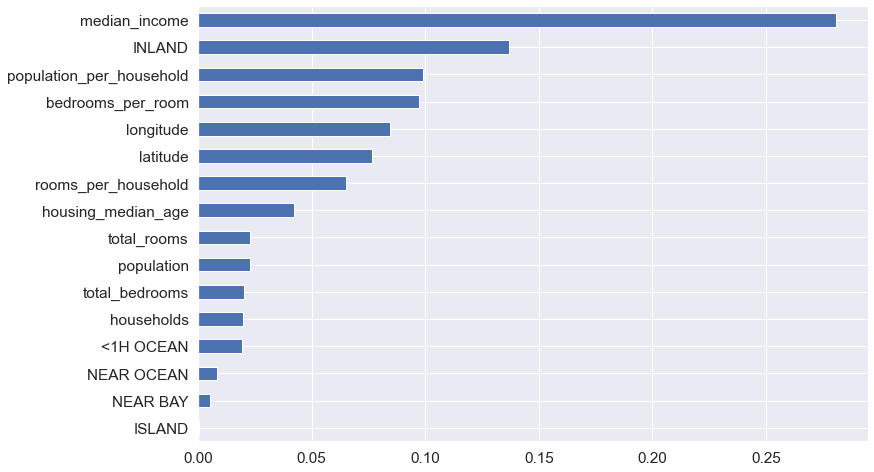

In [93]:
# visualize it :
feature_imp.sort_values().plot.barh(figsize = (12,8))
plt.show()
# and we can see that median_income is the feature with highest importance

### Based on this result, we can drop some values and re-run the model.